# Graph data handling

![](https://pytorch-geometric.readthedocs.io/en/latest/_images/graph.svg)

In [185]:
import torch
from torch_geometric.data import Data

# The edge_index has a size of  2 x num_edges it represents the couples of edges from a node to another
# in this example we have edges from 0 to 1 (1 to 0) and 2to 1 (1 to 2)
# Thow it isn't written in a couple
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[3, 1], edge_index=[2, 4])


In [186]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())
print(data)

Data(x=[3, 1], edge_index=[2, 4])


In [187]:
print(data.keys())

['edge_index', 'x']


In [188]:
print(data['x'])

tensor([[-1.],
        [ 0.],
        [ 1.]])


In [189]:
for key, item in data:
    print(f'{key} found in data')


# 'edge_attr' in data
# >>> False

# data.num_nodes
# >>> 3

# data.num_edges
# >>> 4

# data.num_node_features
# >>> 1

# data.has_isolated_nodes()
# >>> False

# data.has_self_loops()
# >>> False

# data.is_directed()
# >>> False

# # Transfer data object to GPU.
# device = torch.device('cuda')
# data = data.to(device)


x found in data
edge_index found in data


# Benchmark datasets

In [190]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
print(dataset)

print("len dataset =", len(dataset))

print("num_classes =", dataset.num_classes)

print("num_features =", dataset.num_node_features)


ENZYMES(600)
len dataset = 600
num_classes = 6
num_features = 3


In [191]:
data = dataset[0]
print(data)

print(data.is_undirected())

Data(edge_index=[2, 168], x=[37, 3], y=[1])
True


We have a graph of 37 nodes each have 3 features.
168/2 = 84 undirected edges.
The graph is asigned to one class.

In [192]:
# train_dataset = dataset[:540]
# >>> ENZYMES(540)

# test_dataset = dataset[540:]
# >>> ENZYMES(60)

# dataset = dataset.shuffle()
# >>> ENZYMES(600)

In [193]:
# from torch_geometric.datasets import Planetoid

# dataset = Planetoid(root='/tmp/Cora', name='Cora')
# >>> Cora()

# len(dataset)
# >>> 1

# dataset.num_classes
# >>> 7

# dataset.num_node_features
# >>> 1433

# data = dataset[0]
# >>> Data(edge_index=[2, 10556], test_mask=[2708],
#          train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

# data.is_undirected()
# >>> True

# data.train_mask.sum().item()
# >>> 140

# data.val_mask.sum().item()
# >>> 500

# data.test_mask.sum().item()
# >>> 1000

# We can have additional node features like this.

# Mini-batches

In [194]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
print(dataset)

Cora()


In [195]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

[0.366, 0.471, 0.527, 0.578, 0.622, 0.636, 0.656, 0.693, 0.721, 0.741, 0.766, 0.777, 0.782, 0.787, 0.792, 0.794, 0.795, 0.798, 0.8, 0.801, 0.801, 0.803, 0.806, 0.806, 0.805, 0.804, 0.805, 0.807, 0.806, 0.805, 0.804, 0.803, 0.804, 0.804, 0.805, 0.806, 0.805, 0.806, 0.807, 0.808, 0.81, 0.81, 0.81, 0.812, 0.812, 0.812, 0.809, 0.811, 0.809, 0.807, 0.808, 0.808, 0.808, 0.808, 0.808, 0.807, 0.808, 0.808, 0.808, 0.811, 0.811, 0.811, 0.809, 0.809, 0.81, 0.808, 0.808, 0.808, 0.809, 0.806, 0.806, 0.807, 0.804, 0.806, 0.81, 0.809, 0.807, 0.806, 0.805, 0.805, 0.806, 0.804, 0.81, 0.811, 0.814, 0.818, 0.819, 0.817, 0.818, 0.819, 0.819, 0.818, 0.814, 0.811, 0.808, 0.809, 0.807, 0.806, 0.802, 0.801, 0.803, 0.802, 0.802, 0.801, 0.805, 0.808, 0.81, 0.811, 0.811, 0.813, 0.814, 0.812, 0.812, 0.813, 0.814, 0.815, 0.814, 0.813, 0.812, 0.811, 0.813, 0.812, 0.811, 0.81, 0.809, 0.808, 0.809, 0.81, 0.813, 0.811, 0.811, 0.813, 0.815, 0.816, 0.819, 0.82, 0.819, 0.82, 0.819, 0.812, 0.811, 0.811, 0.807, 0.806, 0.80

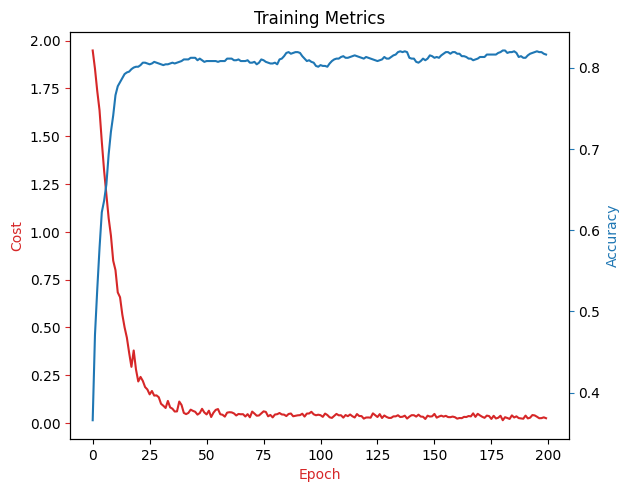

In [196]:
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Lists to store cost and accuracy values
cost_list = []
accuracy_list = []

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    # Save cost (loss) value for this epoch
    cost_list.append(loss.item())

    # Calculate accuracy for this epoch and save it
    model.eval()
    pred = model(data).argmax(dim=1)
    correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
    acc = correct.item() / data.test_mask.sum().item()
    accuracy_list.append(acc)
    model.train()  # Set the model back to training mode

    

# Now you can use cost_list and accuracy_list for further analysis or visualization.
print(accuracy_list)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('Epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)

fig.tight_layout()
plt.title('Training Metrics')
plt.show()

# Exercice

In [197]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/IMDB-BINARY', name='IMDB-BINARY')
print(dataset)

Extracting /tmp/IMDB-BINARY/IMDB-BINARY/IMDB-BINARY.zip
Processing...


IMDB-BINARY(1000)


Done!


In [198]:
dataset = dataset.shuffle()

train_data = dataset[:800]
validation_data = dataset[800:900]
test_data = dataset[900:]
print(train_data, validation_data, test_data)


# DataBatch(batch=[1082], edge_index=[2, 4066], x=[1082, 21], y=[32])
# we have 1082 nodes batch has the number of the graph each node belongs to.
# edge_index is a tensor that has the adges between nodes (4066 edges) we don't know if it is (un)directed.
# x is the tensor that has all the node features which means we ave 1082 nodes, each having 21 features.
# y is the data we are supposed to train against, which means we are going to test against 32 nodes.

IMDB-BINARY(800) IMDB-BINARY(100) IMDB-BINARY(100)
